# Installing the Dependencies

In [118]:
pip install contractions

In [119]:
pip install emoji

# Importing the Libraries

In [120]:
import pandas as pd
import numpy as np
import sklearn
import nltk
import re
import emoji
import string
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [121]:
data=pd.read_csv("tweet_data.csv")

In [122]:
data

,textID,tweet_text,sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative
1,1956967696,Funeral ceremony...gloomy friday...,negative
2,1956967789,wants to hang out with friends SOON!,positive
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative
...,...,...,...
18722,1753918818,"had SUCH and AMAZING time last night, McFly we...",positive
18723,1753918881,@jasimmo Ooo showing of your French skills!! l...,positive
18724,1753918900,Succesfully following Tayla!!,positive
18725,1753919001,Happy Mothers Day All my love,positive


In [123]:
data.info()
data.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18727 entries, 0 to 18726
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   textID      18727 non-null  int64 
 1   tweet_text  18727 non-null  object
 2   sentiment   18727 non-null  object
dtypes: int64(1), object(2)
memory usage: 439.0+ KB


,textID,tweet_text,sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative
1,1956967696,Funeral ceremony...gloomy friday...,negative
2,1956967789,wants to hang out with friends SOON!,positive
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative
...,...,...,...
18722,1753918818,"had SUCH and AMAZING time last night, McFly we...",positive
18723,1753918881,@jasimmo Ooo showing of your French skills!! l...,positive
18724,1753918900,Succesfully following Tayla!!,positive
18725,1753919001,Happy Mothers Day All my love,positive


# Cleaning the Text

In [124]:
def clean_text(text):
  text=text.lower() # converting to lower case letter
  text=re.sub(r'https?://\S+|www\.\S+','',text) # Removing urls
  text=re.sub(r'<.*?>','',text) # removing html tags
  text=re.sub(r'\n','',text) # removing newline character
  text=re.sub(r'[%s+]' % re.escape(string.punctuation),' ', text) # removing punctuations
  text=re.sub(r'\w*\d+\w*','',text) # removing letter which is having digits in it
  text=re.sub(r' +',' ',text) # removing more white spaces
  text=re.sub(r'(.)\1+', r'\1',text) # removing repetitive characters
  text=emoji.demojize(text) # Removing emojis
  text=contractions.fix(text) # removing contractions
  text=re.sub(r'[^A-Za-z0-9\s]', '', text) # removing non - alphanumric characters
  return text
data['clean_data']=data['tweet_text'].apply(lambda x:clean_text(x))

In [125]:
data

,textID,tweet_text,sentiment,clean_data
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative,layin n bed with a headache ugh waitin on your...
1,1956967696,Funeral ceremony...gloomy friday...,negative,funeral ceremony glomy friday
2,1956967789,wants to hang out with friends SOON!,positive,wants to hang out with friends son
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative,re pinging why didn t you go to prom because m...
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative,hm is down
...,...,...,...,...
18722,1753918818,"had SUCH and AMAZING time last night, McFly we...",positive,had such and amazing time last night mcfly wer...
18723,1753918881,@jasimmo Ooo showing of your French skills!! l...,positive,jasimo o showing of your french skils lol thi...
18724,1753918900,Succesfully following Tayla!!,positive,sucesfuly folowing tayla
18725,1753919001,Happy Mothers Day All my love,positive,hapy mothers day al my love


#Downloading the Dependencies

In [126]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
Lemmatizer=WordNetLemmatizer()
stop_word=set(stopwords.words('english'))
stop_word.discard('not')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Processing the text After cleaning up

In [127]:
def processed_text(text):
  tokens=word_tokenize(text) # tokenization
  tokens=[token for token in tokens if token not in stop_word] # Removing the stop words
  tokens=[Lemmatizer.lemmatize(token) for token in tokens] # Lemmatization
  return tokens
data['Processed_text']=data['clean_data'].apply(lambda x: processed_text(x))

In [128]:
data

,textID,tweet_text,sentiment,clean_data,Processed_text
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative,layin n bed with a headache ugh waitin on your...,"[layin, n, bed, headache, ugh, waitin, cal]"
1,1956967696,Funeral ceremony...gloomy friday...,negative,funeral ceremony glomy friday,"[funeral, ceremony, glomy, friday]"
2,1956967789,wants to hang out with friends SOON!,positive,wants to hang out with friends son,"[want, hang, friend, son]"
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative,re pinging why didn t you go to prom because m...,"[pinging, go, prom, bf, like, friend]"
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative,hm is down,[hm]
...,...,...,...,...,...
18722,1753918818,"had SUCH and AMAZING time last night, McFly we...",positive,had such and amazing time last night mcfly wer...,"[amazing, time, last, night, mcfly, incredible]"
18723,1753918881,@jasimmo Ooo showing of your French skills!! l...,positive,jasimo o showing of your french skils lol thi...,"[jasimo, showing, french, skils, lol, thing, g..."
18724,1753918900,Succesfully following Tayla!!,positive,sucesfuly folowing tayla,"[sucesfuly, folowing, tayla]"
18725,1753919001,Happy Mothers Day All my love,positive,hapy mothers day al my love,"[hapy, mother, day, al, love]"


# Vectorization of the Processed Text

In [129]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(tokenizer=lambda x : x,
                   preprocessor=lambda x : x)
X=cv.fit_transform(data['Processed_text'])
vectorized_data = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [130]:
vectorized_data

,ab,aba,abalone,abandon,abandoned,abandoning,abandonment,abang,abc,abefied,...,zulu,zumba,zune,zurieventslc,zuzu,zwhitejd,zwriter,zy,zykloid,zyrtec
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18724,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Preparation of the Data For the ML Model(Sentiment Analysis)

In [131]:
X=vectorized_data
y=data['sentiment']

#Splitting the data for the training and testing

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.80,random_state=0)

# Fitting the model (Logistic Regression)

In [133]:
from sklearn.linear_model import LogisticRegression
Reg=LogisticRegression()
Reg.fit(X_train,y_train)


LogisticRegression()

# Predicting the value and finding the confusion matrix and Accuracy Score

In [134]:
y_pred=Reg.predict(X_test)

In [135]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.8540248297957549
[[6072 1230]
 [ 957 6723]]


In [138]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

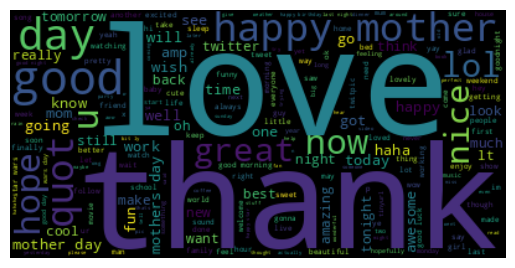

In [139]:
pos_tweets = data[data["sentiment"]=="positive"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()